**1. Introduction**

**Background**

The purpose of the project is to help XYZ Inc in scouting for a suitable location to open a **hotel/restaurant** in Salt Lake City so that they can make a conscious call on the investments made on the location of the hotel/ restaurant and aim to make it a profit making venture .

**The Location**

Salt Lake City is a well-planned satellite township in Kolkata located on the eastern part of India. The area is divided into multiple sectors, which are further sub-divided into various blocks. Dynamic and with a constantly evolving landscape with large green spaces and water bodies, Salt Lake is a vibrant part of the city comprising of both residential and commercial areas and is also the main IT hub of the city.

**Key Ask**

Considering the substantial opportunity that the township offers in terms of the hospitality industry, the customer would like to have a study performed based on the current competitive landscape so that meaningful insights can be derived to help them decide on a viable location for opening a hotel/restaurant.

**2. Data**

**• GeoPy Python** package would be used to obtain the latitude and the longitude coordinates of all the locations

• **Foursquare API** would be used to obtain information about

(i) The existing hotels and restaurants in Salt Lake City


(ii) Explore additional venues and locations with in a specified radius

**•** All Data is transformed into **pandas dataframe**

**• Folium** Python library to visualize the results on a map

**3. Methodology**

Import libraries

In [2]:
# Import libraries
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # JSON files manipulation

from sklearn.cluster import KMeans # clustering algorithm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print ("Libraries Loaded")

/bin/bash: conda: command not found
/bin/bash: conda: command not found
Libraries Loaded


Four Square Credentials and Location

In [3]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = ''
LIMIT = 150

address= "Salt Lake City, Kolkata"

geolocator = Nominatim(user_agent="Course Capstone")
location = geolocator.geocode(address)
latitude =location.latitude   
longitude =location.longitude 

saltlake='Salt lake location : {},{}'.format(latitude,longitude)
print(saltlake)

Salt lake location : 22.5735344,88.4132664


Search for hotels, restaurants and cafes  within 1.5 KM of Salt lake City core location using Foursquare API

In [4]:
search_query_h = 'hotel'
search_query_r = 'restaurant'
search_query_c = 'cafe'

radius = 1500
url_hotel = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_h, radius, LIMIT)
url_restaurant = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_r, radius, LIMIT)
url_cafe = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_c, radius, LIMIT)

Get Request to obtain results of queries for hotels,restaurants and cafes

In [5]:
results_hotel = requests.get(url_hotel).json()
results_restaurant = requests.get(url_restaurant).json()
results_cafe = requests.get(url_cafe).json()

Get relevant part of JSON and transform it into a pandas dataframe

In [6]:
# assign relevant part of JSON to venues
venues_hotel = results_hotel['response']['venues']
venues_restaurant = results_restaurant['response']['venues']
venues_cafe = results_cafe['response']['venues']

# tranform venues into a dataframe 
dataframe_hotel = json_normalize(venues_hotel)
dataframe_restaurant = json_normalize(venues_restaurant)
dataframe_cafe = json_normalize(venues_cafe)

#Merge the data from three data frames
dataframe = pd.concat([dataframe_hotel,dataframe_restaurant,dataframe_cafe])

print("There are {} restaurants, cafes and hotels at Salt Lake City".format(dataframe.shape[0]))

There are 30 restaurants, cafes and hotels at Salt Lake City


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


In [7]:
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.crossStreet,location.neighborhood
0,4bd5c2649649ce7293a0511d,Hotel The Sojourn,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1595425291,False,"Plot No. KB 23 Sector 3, Salt Lake",22.566729,88.411087,"[{'label': 'display', 'lat': 22.56672920548098...",789,700098,IN,Kolkata,West Bengal,India,"[Plot No. KB 23 Sector 3, Salt Lake, Kolkata 7...",116015625,NaN,NaN
1,4bd885802ecdce720dcbd0f2,The Pearl Hotel,"[{'id': '4bf58dd8d48988d1f8931735', 'name': 'B...",v-1595425291,False,"35/Z, Radha Madhav Dutta Garden Ln",22.569062,88.404429,"[{'label': 'display', 'lat': 22.56906211992474...",1035,700010,IN,Kolkata,West Bengal,India,"[35/Z, Radha Madhav Dutta Garden Ln, Kolkata 7...",NaN,NaN,NaN
2,50195e27e4b02547cec93e58,Sanjib Hotel & Restaurant,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1595425291,False,"G1/727, Sukanta Nagar, Sector V, Salt Lake",22.559192,88.414024,"[{'label': 'display', 'lat': 22.55919174877874...",1598,700098,IN,Kolkata,West Bengal,India,"[G1/727, Sukanta Nagar, Sector V, Salt Lake, K...",NaN,NaN,NaN
3,5c13aa78b9ac38002c63100e,Visitel Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1595425291,False,NaN,22.574566,88.402409,"[{'label': 'display', 'lat': 22.574566, 'lng':...",1121,700054,IN,Kolkata,West Bengal,India,"[Kolkata 700054, West Bengal, India]",NaN,NaN,NaN
4,50e95b1ce4b0ae33cb6b7f7d,Nirala Hotel,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1595425291,False,GD Market,22.579412,88.421278,"[{'label': 'display', 'lat': 22.57941223684574...",1051,NaN,IN,NaN,West Bengal,India,"[GD Market (Sector III), GD marrket, West Beng...",NaN,Sector III,NaN


Filter Dataframe by relevant columns

In [8]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]
dataframe_filtered

,name,categories,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.neighborhood,id
0,Hotel The Sojourn,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...","Plot No. KB 23 Sector 3, Salt Lake",22.566729,88.411087,"[{'label': 'display', 'lat': 22.56672920548098...",789,700098,IN,Kolkata,West Bengal,India,"[Plot No. KB 23 Sector 3, Salt Lake, Kolkata 7...",NaN,NaN,4bd5c2649649ce7293a0511d
1,The Pearl Hotel,"[{'id': '4bf58dd8d48988d1f8931735', 'name': 'B...","35/Z, Radha Madhav Dutta Garden Ln",22.569062,88.404429,"[{'label': 'display', 'lat': 22.56906211992474...",1035,700010,IN,Kolkata,West Bengal,India,"[35/Z, Radha Madhav Dutta Garden Ln, Kolkata 7...",NaN,NaN,4bd885802ecdce720dcbd0f2
2,Sanjib Hotel & Restaurant,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...","G1/727, Sukanta Nagar, Sector V, Salt Lake",22.559192,88.414024,"[{'label': 'display', 'lat': 22.55919174877874...",1598,700098,IN,Kolkata,West Bengal,India,"[G1/727, Sukanta Nagar, Sector V, Salt Lake, K...",NaN,NaN,50195e27e4b02547cec93e58
3,Visitel Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",NaN,22.574566,88.402409,"[{'label': 'display', 'lat': 22.574566, 'lng':...",1121,700054,IN,Kolkata,West Bengal,India,"[Kolkata 700054, West Bengal, India]",NaN,NaN,5c13aa78b9ac38002c63100e
4,Nirala Hotel,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",GD Market,22.579412,88.421278,"[{'label': 'display', 'lat': 22.57941223684574...",1051,NaN,IN,NaN,West Bengal,India,"[GD Market (Sector III), GD marrket, West Beng...",Sector III,NaN,50e95b1ce4b0ae33cb6b7f7d
5,Altair Boutique Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",Ambuja Neotia Ecocenter,22.576707,88.428161,"[{'label': 'display', 'lat': 22.57670749665953...",1571,700091,IN,Kolkata,West Bengal,India,"[Ambuja Neotia Ecocenter, Kolkata 700091, West...",NaN,NaN,5c1a71b416fa04002c23cfcd
6,Monotel Business Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...","DN Block, Sector V, Salt Lake",22.578023,88.427737,"[{'label': 'display', 'lat': 22.57802337522068...",1569,700091,IN,Kolkata,West Bengal,India,"[DN Block, Sector V, Salt Lake, Kolkata 700091...",NaN,NaN,52163cc993cd196b5be7277d
7,Hyatt Regency Kolkata,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",Ja-1 Sector Iii Salt Lake City,22.570358,88.405319,"[{'label': 'display', 'lat': 22.57035786688575...",890,700098,IN,Kolkata,West Bengal,India,"[Ja-1 Sector Iii Salt Lake City, Kolkata 70009...",NaN,NaN,4bc788f893bdeee1927d37ae
0,Mini Restaurant,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",NaN,22.570452,88.405310,"[{'label': 'display', 'lat': 22.57045202644933...",886,NaN,IN,NaN,NaN,India,[India],NaN,NaN,4fba4857e4b06ef132cc25cd
1,Mallika Restaurant,"[{'id': '4bf58dd8d48988d147941735', 'name': 'D...",FE-11,22.583630,88.417073,"[{'label': 'display', 'lat': 22.58363001185617...",1190,700106,IN,Kolkata,West Bengal,India,"[FE-11 (Salt Lake Sector 3), Kolkata 700106, W...",Salt Lake Sector 3,NaN,508bf809e4b06f6d191b16b3


Get Categories of the venue 

In [9]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row

dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1).astype(str)
dataframe_filtered


,name,categories,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.neighborhood,id
0,Hotel The Sojourn,Hotel,"Plot No. KB 23 Sector 3, Salt Lake",22.566729,88.411087,"[{'label': 'display', 'lat': 22.56672920548098...",789,700098,IN,Kolkata,West Bengal,India,"[Plot No. KB 23 Sector 3, Salt Lake, Kolkata 7...",NaN,NaN,4bd5c2649649ce7293a0511d
1,The Pearl Hotel,Bed & Breakfast,"35/Z, Radha Madhav Dutta Garden Ln",22.569062,88.404429,"[{'label': 'display', 'lat': 22.56906211992474...",1035,700010,IN,Kolkata,West Bengal,India,"[35/Z, Radha Madhav Dutta Garden Ln, Kolkata 7...",NaN,NaN,4bd885802ecdce720dcbd0f2
2,Sanjib Hotel & Restaurant,Indian Restaurant,"G1/727, Sukanta Nagar, Sector V, Salt Lake",22.559192,88.414024,"[{'label': 'display', 'lat': 22.55919174877874...",1598,700098,IN,Kolkata,West Bengal,India,"[G1/727, Sukanta Nagar, Sector V, Salt Lake, K...",NaN,NaN,50195e27e4b02547cec93e58
3,Visitel Hotel,Hotel,NaN,22.574566,88.402409,"[{'label': 'display', 'lat': 22.574566, 'lng':...",1121,700054,IN,Kolkata,West Bengal,India,"[Kolkata 700054, West Bengal, India]",NaN,NaN,5c13aa78b9ac38002c63100e
4,Nirala Hotel,Indian Restaurant,GD Market,22.579412,88.421278,"[{'label': 'display', 'lat': 22.57941223684574...",1051,NaN,IN,NaN,West Bengal,India,"[GD Market (Sector III), GD marrket, West Beng...",Sector III,NaN,50e95b1ce4b0ae33cb6b7f7d
5,Altair Boutique Hotel,Hotel,Ambuja Neotia Ecocenter,22.576707,88.428161,"[{'label': 'display', 'lat': 22.57670749665953...",1571,700091,IN,Kolkata,West Bengal,India,"[Ambuja Neotia Ecocenter, Kolkata 700091, West...",NaN,NaN,5c1a71b416fa04002c23cfcd
6,Monotel Business Hotel,Hotel,"DN Block, Sector V, Salt Lake",22.578023,88.427737,"[{'label': 'display', 'lat': 22.57802337522068...",1569,700091,IN,Kolkata,West Bengal,India,"[DN Block, Sector V, Salt Lake, Kolkata 700091...",NaN,NaN,52163cc993cd196b5be7277d
7,Hyatt Regency Kolkata,Hotel,Ja-1 Sector Iii Salt Lake City,22.570358,88.405319,"[{'label': 'display', 'lat': 22.57035786688575...",890,700098,IN,Kolkata,West Bengal,India,"[Ja-1 Sector Iii Salt Lake City, Kolkata 70009...",NaN,NaN,4bc788f893bdeee1927d37ae
0,Mini Restaurant,Indian Restaurant,NaN,22.570452,88.405310,"[{'label': 'display', 'lat': 22.57045202644933...",886,NaN,IN,NaN,NaN,India,[India],NaN,NaN,4fba4857e4b06ef132cc25cd
1,Mallika Restaurant,Diner,FE-11,22.583630,88.417073,"[{'label': 'display', 'lat': 22.58363001185617...",1190,700106,IN,Kolkata,West Bengal,India,"[FE-11 (Salt Lake Sector 3), Kolkata 700106, W...",Salt Lake Sector 3,NaN,508bf809e4b06f6d191b16b3


Clean up Column names

In [10]:
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

#dataframe_filtered
df_new=dataframe_filtered[['name','categories','distance','lat','lng','id']]
df_new

,name,categories,distance,lat,lng,id
0,Hotel The Sojourn,Hotel,789,22.566729,88.411087,4bd5c2649649ce7293a0511d
1,The Pearl Hotel,Bed & Breakfast,1035,22.569062,88.404429,4bd885802ecdce720dcbd0f2
2,Sanjib Hotel & Restaurant,Indian Restaurant,1598,22.559192,88.414024,50195e27e4b02547cec93e58
3,Visitel Hotel,Hotel,1121,22.574566,88.402409,5c13aa78b9ac38002c63100e
4,Nirala Hotel,Indian Restaurant,1051,22.579412,88.421278,50e95b1ce4b0ae33cb6b7f7d
5,Altair Boutique Hotel,Hotel,1571,22.576707,88.428161,5c1a71b416fa04002c23cfcd
6,Monotel Business Hotel,Hotel,1569,22.578023,88.427737,52163cc993cd196b5be7277d
7,Hyatt Regency Kolkata,Hotel,890,22.570358,88.405319,4bc788f893bdeee1927d37ae
0,Mini Restaurant,Indian Restaurant,886,22.570452,88.405310,4fba4857e4b06ef132cc25cd
1,Mallika Restaurant,Diner,1190,22.583630,88.417073,508bf809e4b06f6d191b16b3


In [11]:
df_new['categories'].unique()

array(['Hotel', 'Bed & Breakfast', 'Indian Restaurant', 'Diner',
       'Restaurant', 'Vegetarian / Vegan Restaurant',
       'South Indian Restaurant', 'Bengali Restaurant', 'Pizza Place',
       'Café', 'Internet Cafe', 'Fast Food Restaurant'], dtype=object)

Location of hotels/ resturants/cafes are to be displayed on a map 

In [12]:
import folium # map rendering library
df_new_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around Salt Lake City , Kolkata

# add a red circle marker to represent Salt Lake City
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Salt Lake',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(df_new_map)

# add blue circle markers to represent the hotels and resturants
label = list(df_new.name)
for lat, lng, label in zip(df_new.lat, df_new.lng, df_new.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(df_new_map)

# display map
df_new_map

Prepare a bar chart to show the distance between the core locations and the  hotels/resturants/cafes

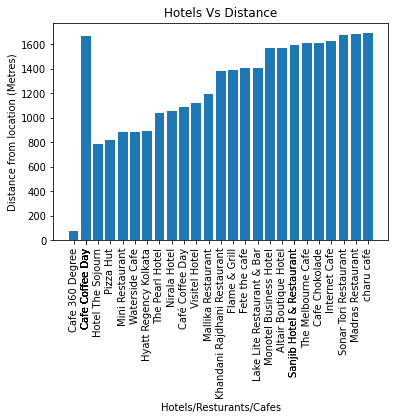

Average distance between hotels and core location is 1188 metres


In [13]:
distance_hotel_df=df_new[['name','categories','distance','lat','lng']].sort_values('distance')

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(distance_hotel_df.name))
    plt.bar(distance_hotel_df.name, distance_hotel_df.distance)
    plt.xlabel('Hotels/Resturants/Cafes')
    plt.ylabel('Distance from location (Metres)')
    plt.xticks(distance_hotel_df.name,rotation=90)
    plt.title('Hotels Vs Distance')
    plt.show()
plot_bar_x()

print("Average distance between hotels and core location is {} metres".format(int(sum(df_new['distance'])/df_new.shape[0])))

Explore other venues in Salt Lake City 

In [14]:
radius=1500
url_venues = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

In [15]:
results_venues = requests.get(url_venues).json()
'There are {} venues around Salt Lake .'.format(len(results_venues['response']['groups'][0]['items']))

'There are 40 venues around Salt Lake .'

In [16]:
items_venues = results_venues['response']['groups'][0]['items']
#items_venues[0]

In [17]:
dataframe_venues = json_normalize(items_venues) 
# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe_venues.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered_venues = dataframe_venues.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered_venues['venue.categories'] = dataframe_filtered_venues.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered_venues.columns = [col.split('.')[-1] for col in dataframe_filtered_venues.columns]

dataframe_filtered_venues.name

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


0                               Cafe 360 Degree
1                         Hyatt Regency Kolkata
2                              Carnival Cinemas
3                                        Stadel
4                                          INOX
5     Yuvabharati Krirangan (Salt Lake Stadium)
6                                     La Cucina
7                                 Charnock City
8                                        Subway
9                              Mani Square Mall
10                               Waterside Cafe
11                                   McDonald's
12                              Cafe Coffee Day
13                                  Ground Zero
14                                Flame & Grill
15                                     PVR (XL)
16                                  Bowlers Den
17                                       Subway
18                             Abcos Food Plaza
19                                          KFC
20                                   Nic

In [19]:
# Data extracted from foursquare venues
df_venue=pd.DataFrame(dataframe_filtered_venues[['name','categories','distance','lat','lng','id']])
df_venue

,name,categories,distance,lat,lng,id
0,Cafe 360 Degree,Café,70,22.573511,88.413953,4e5df62daeb78833bb8576c9
1,Hyatt Regency Kolkata,Hotel,890,22.570358,88.405319,4bc788f893bdeee1927d37ae
2,Carnival Cinemas,Movie Theater,51,22.573300,88.413693,54f84dce498e211ce5c20c9e
3,Stadel,Diner,518,22.569257,88.411274,4ce160d9df986ea8c649ec16
4,INOX,Multiplex,1292,22.570893,88.401026,4d4404083616b60c94b5dfc2
5,Yuvabharati Krirangan (Salt Lake Stadium),Soccer Stadium,707,22.569197,88.408232,4d5f52e3ef378cfa06736ea6
6,La Cucina,Italian Restaurant,861,22.570970,88.405358,4ba25edaf964a52033f237e3
7,Charnock City,Indian Restaurant,720,22.567352,88.411205,4d81bd59ebb4236a6f764558
8,Subway,Sandwich Place,527,22.569605,88.410401,512e38bbe4b02c71f826f478
9,Mani Square Mall,Shopping Mall,1387,22.577823,88.400591,4c333482a0ced13af334166e


In [20]:
df_venue['categories'].unique()

array(['Café', 'Hotel', 'Movie Theater', 'Diner', 'Multiplex',
       'Soccer Stadium', 'Italian Restaurant', 'Indian Restaurant',
       'Sandwich Place', 'Shopping Mall', 'Fast Food Restaurant',
       'Hookah Bar', 'Karaoke Bar', 'Fried Chicken Joint', 'Theme Park',
       'Vegetarian / Vegan Restaurant', 'Bowling Alley', 'Food',
       'Department Store', 'Beer Bar', 'Plaza', 'Convenience Store',
       'Food Court', 'Restaurant', 'Clothing Store', 'Bakery',
       'Mediterranean Restaurant', 'Food Truck'], dtype=object)

Removing resturants , hotels and cafes from the explored list to obtain other specific venues

In [21]:
df_venue = df_venue.drop([0,1,3,6,7,8,10,11,12,13,14,16,17,18,19,21,23,24,26,27,29,31,32,33,35,36,37,38,39], axis=0)
print("There are {} venues in Salt lake".format(df_venue.shape[0]))
df_venue

There are 11 venues in Salt lake


,name,categories,distance,lat,lng,id
2,Carnival Cinemas,Movie Theater,51,22.573300,88.413693,54f84dce498e211ce5c20c9e
4,INOX,Multiplex,1292,22.570893,88.401026,4d4404083616b60c94b5dfc2
5,Yuvabharati Krirangan (Salt Lake Stadium),Soccer Stadium,707,22.569197,88.408232,4d5f52e3ef378cfa06736ea6
9,Mani Square Mall,Shopping Mall,1387,22.577823,88.400591,4c333482a0ced13af334166e
15,PVR (XL),Multiplex,1390,22.577859,88.400579,4d0111e6f7988eecee2b5de7
20,Nicco Park,Theme Park,801,22.571358,88.420695,4c234b3113c00f47a0be88de
22,Nicco Super Bowl,Bowling Alley,816,22.572807,88.421175,4d6100dbb6b9a1cdc8578251
25,Big Bazaar,Department Store,1198,22.583548,88.417543,4be982bb947820a1e916b6db
28,Nico Park Plaza,Plaza,1284,22.570518,88.425325,50c207bde4b064777206c0d6
30,Brand Factory,Convenience Store,1299,22.563254,88.407283,4fce783fe4b0fb844e12e6a3


In [22]:
df_venue['categories'].unique()

array(['Movie Theater', 'Multiplex', 'Soccer Stadium', 'Shopping Mall',
       'Theme Park', 'Bowling Alley', 'Department Store', 'Plaza',
       'Convenience Store', 'Clothing Store'], dtype=object)

Display a map with the venues, hotels, resturants and cafes

In [23]:
import folium # map rendering library
venue_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around Salt Lake City , Kolkata

# add a red circle marker to represent Salt Lake City
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Salt Lake',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venue_map)

# add blue circle markers to represent the hotels and resturants
label = list(df_new.name)
for lat, lng, label in zip(df_new.lat, df_new.lng, df_new.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venue_map)

 # add green circle markers to represent the hotels and resturants
label = list(df_venue)
for lat, lng, label in zip(df_venue.lat, df_venue.lng, df_venue.name):
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venue_map)   

# display map
venue_map

Plot the distance of the venues from the core location

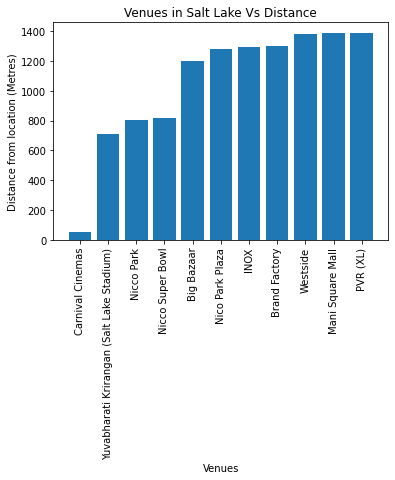

In [24]:
distance_venues_df=df_venue.sort_values('distance')

def plot_bar_venue():
    # this is for plotting purpose
    index = np.arange(len(distance_venues_df.name))
    plt.bar(distance_venues_df.name, distance_venues_df.distance)
    plt.xlabel('Venues')
    plt.ylabel('Distance from location (Metres)')
    plt.xticks(distance_venues_df.name,rotation=90)
    plt.title('Venues in Salt Lake Vs Distance')
    plt.show()
plot_bar_venue()

Clustering Based on Venues

In [25]:
neighbor_onehot = pd.get_dummies(df_venue[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
neighbor_onehot['name'] = df_venue['name'] 

# move neighborhood column to the first column
fixed_columns = [neighbor_onehot.columns[-1]] + list(neighbor_onehot.columns[:-1])
neighbor_onehot = neighbor_onehot[fixed_columns]

neighbor_onehot

,name,Bowling Alley,Clothing Store,Convenience Store,Department Store,Movie Theater,Multiplex,Plaza,Shopping Mall,Soccer Stadium,Theme Park
2,Carnival Cinemas,0,0,0,0,1,0,0,0,0,0
4,INOX,0,0,0,0,0,1,0,0,0,0
5,Yuvabharati Krirangan (Salt Lake Stadium),0,0,0,0,0,0,0,0,1,0
9,Mani Square Mall,0,0,0,0,0,0,0,1,0,0
15,PVR (XL),0,0,0,0,0,1,0,0,0,0
20,Nicco Park,0,0,0,0,0,0,0,0,0,1
22,Nicco Super Bowl,1,0,0,0,0,0,0,0,0,0
25,Big Bazaar,0,0,0,1,0,0,0,0,0,0
28,Nico Park Plaza,0,0,0,0,0,0,1,0,0,0
30,Brand Factory,0,0,1,0,0,0,0,0,0,0


In [26]:
neighbor_onehot.shape
neighbor_grouped = neighbor_onehot.groupby('name').mean().reset_index()

In [28]:
# Top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['name'] = neighbor_grouped['name']


In [ ]:
# Clustering

# set number of clusters
kclusters = 3

neighbor_grouped_clustering = neighbor_grouped.drop('name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neighbor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Clusters', kmeans.labels_)

neighbor_merged = df_venue

# merge 
neighbor_merged = neighbor_merged.join(neighborhoods_venues_sorted.set_index('name'), on='name')

kmeans

In [36]:
fin=neighbor_merged.groupby(['Clusters']).mean()

lati=sum(fin.lat)/len(fin.lat)
longi=sum(fin.lng)/len(fin.lng)

#Taking midpoint of top ten closest venues
venues_lan=sum(df_venue.lat)/len(df_venue.lat)
venues_lng=sum(df_venue.lng)/len(df_venue.lng)

final_latitude=(lati+venues_lan)/2
final_longitude=(longi+venues_lng)/2

print("Potential location  (Orange Dot in the map generated below ) of the new resturant:{},{}".format(final_latitude,final_longitude))

Potential location  (Orange Dot in the map generated below ) of the new resturant:22.574226346438508,88.40792437661369


In [37]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=17)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

folium.CircleMarker(
    [final_latitude, final_longitude],
    radius=10,
    color='orange',
    popup='Potential location',
    fill = True,
    fill_color = 'orange',
    fill_opacity = 0.8
).add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighbor_merged['lat'], neighbor_merged['lng'], neighbor_merged['name'], neighbor_merged['Clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

       
map_clusters

Map to showcase overall landscape including potential location of hotel/ resturant, core location , hotels and resturants in the vicinity and the venue clusters 

In [38]:
Potential_location = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around Salt Lake core location


# add a orange circle marker to represent the potential location
folium.CircleMarker(
    [final_latitude, final_longitude],
    radius=10,
    color='orange',
    popup='Potential Location',
    fill = True,
    fill_color = 'orange',
    fill_opacity = 0.6
).add_to(Potential_location)


# add a red circle marker to represent the core location of Salt Lake City
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Salt Lake City',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(Potential_location)

# add the hotels, restaurants and cafes as blue circle markers
label = list(df_new.name)
for lat, lng, label in zip(df_new.lat, df_new.lng, df_new.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Potential_location)
    
    
markers_colors = []
for lat, lon, poi, cluster in zip(neighbor_merged['lat'], neighbor_merged['lng'], neighbor_merged['name'], neighbor_merged['Clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=0.7).add_to(Potential_location)


# display map
Potential_location

**4. Results**

Considering a 1.5 km radius from the core location of **Salt Lake City**  located at **(22.5735344 lat, 88.4132664 lng)** , around **30 **restaurants, cafes and hotels were found using **Foursquare API search**. 
A broad classification is provided below:

*  Restaurants -12
*  Cafe-12
*  Hotel-4
*  Bed & Breakfast -1

Average distance between hotels/ restaurants / cafes from the core location is 1188 meters, the closest ones are **Cafe 360Degrees, Cafe Coffee Day , Hotel The Sojourn**.

Around **40 venues** are found using **Foursquare API explore** with in 1.5 km radius of the core location of which  **11** venues are considered after dropping all the hotels, restaurants, cafes and other food and drinks joints from the data frame.

The **potential location** of the new restaurant **(22.574226346438508 lat,88.40792437661369 lng)  at GA block** is collated based on the location of the centroid of all the clusters and proximity to the core location.



**5. Discussion**

On further review it is noticed that the cuisine served in the restaurants around Salt Lake are predominantly **Indian, Vegetarian / Vegan, Italian, Mediterranean etc**. The search using  Four Square API does not show any **Chinese or Continental** food joint which are also popular cuisines in the city . This can be deliberated further on the choice of cuisine to be served by the restaurant.
Also the potential location has a few cafes nearby so there should not be much competition for the new restaurant with a different variety of cuisine. 

**Conclusion**

The identified venue for the new restaurant **(22.574226346438508 lat, 88.40792437661369 lng) at GA block** has limited competition while being close to the core location and  accessible from the main venues in the area  which could potentially  ensure footfall. 

Type of cuisine to be served like **Chinese** or **Continental** can be analyzed further.

Limitation: Analysis is performed using the data available using Four Square API, this can be further enhanced using data available from additional sources. 
